<a href="https://colab.research.google.com/github/Shafrinnisha/OIBSIP_Data_Science/blob/main/2_Employment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Load the dataset
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# Display sample of the dataset
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
183,Punjab,31-05-2020,M,28.33,6872938,38.39,North,31.1471,75.3412
184,Punjab,30-06-2020,M,16.55,8390766,40.18,North,31.1471,75.3412
111,Karnataka,31-03-2020,M,3.46,22079653,41.14,South,15.3173,75.7139
200,Sikkim,30-04-2020,M,2.28,215303,38.70,Northeast,27.5330,88.5122
101,Jharkhand,31-03-2020,M,8.23,9638115,39.34,East,23.6102,85.2799


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
# Check for duplicates
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
# Convert the date_column to datetime format
df[' Date'] = pd.to_datetime(df[' Date'])

# Extract day, month, and year
df['day'] = df[' Date'].dt.day
df['month'] = df[' Date'].dt.month
df['year'] = df[' Date'].dt.year

# Display sample after date conversion
df.sample(2)

<ipython-input-48-97c838ae7fa9>:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
73,Haryana,2020-04-30,M,43.22,5647630,44.38,North,29.0588,76.0856,30,4,2020
135,Madhya Pradesh,2020-07-31,M,5.08,23940158,40.88,West,22.9734,78.6569,31,7,2020


In [ ]:
# Descriptive statistics
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,day,month,year
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000,267.000000,267.0
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425,30.505618,5.535581,2020.0
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400,29.000000,1.000000,2020.0
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600,30.000000,3.000000,2020.0
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300,31.000000,6.000000,2020.0
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900,31.000000,8.000000,2020.0
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600,31.000000,10.000000,2020.0
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738,0.668129,2.870915,0.0


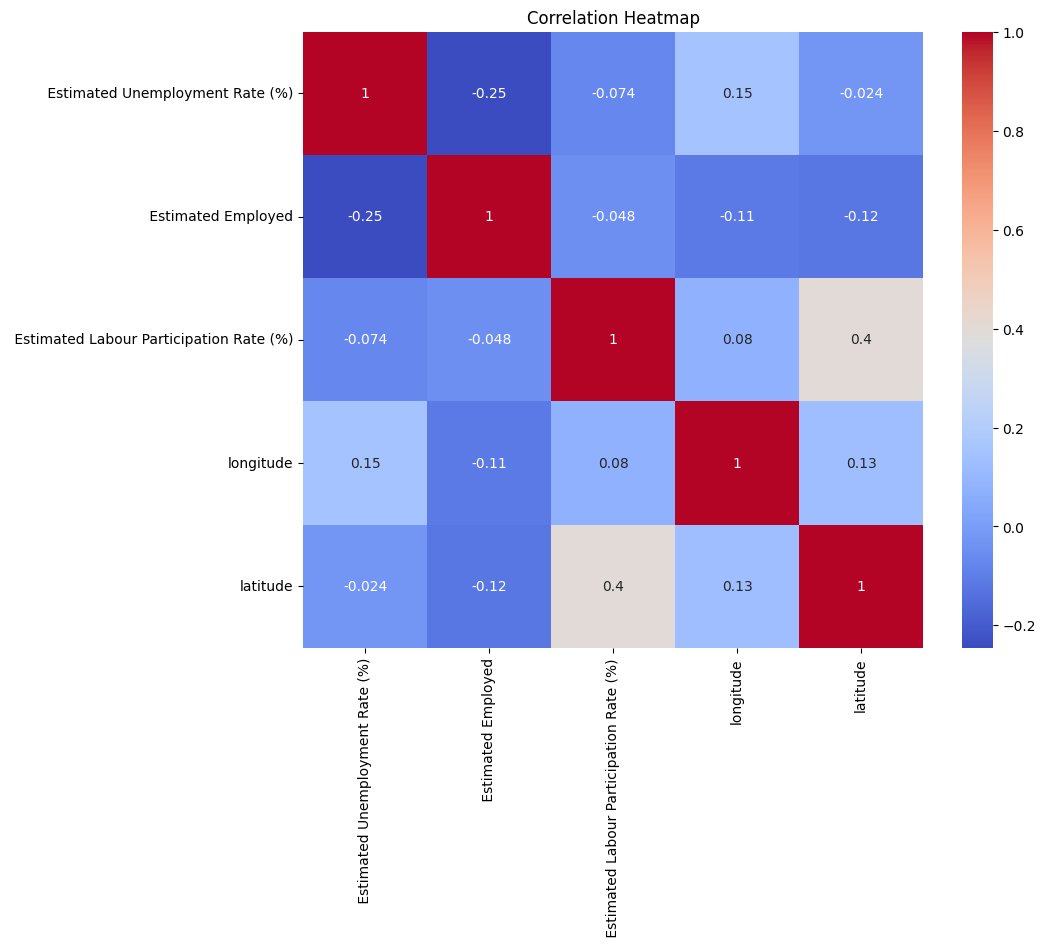

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[[' Estimated Unemployment Rate (%)',
                ' Estimated Employed',
                ' Estimated Labour Participation Rate (%)',
                'longitude','latitude']
               ].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

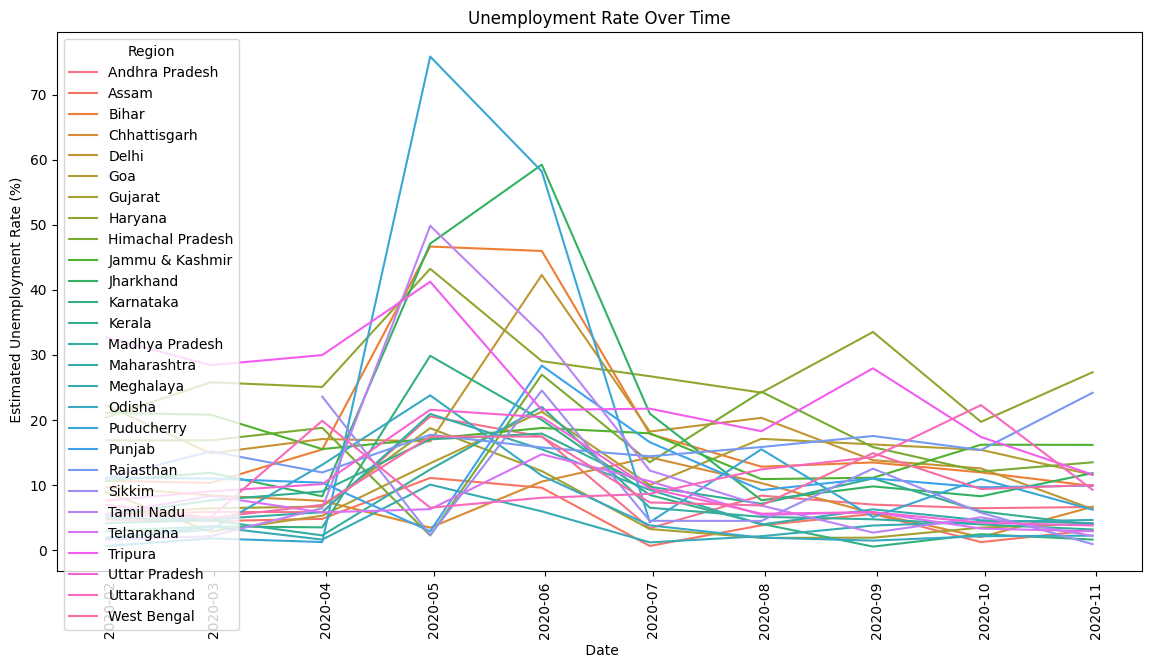

In [ ]:
# Line plot of Unemployment Rate over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, hue='Region')
plt.xticks(rotation=90)
plt.title("Unemployment Rate Over Time")
plt.show()

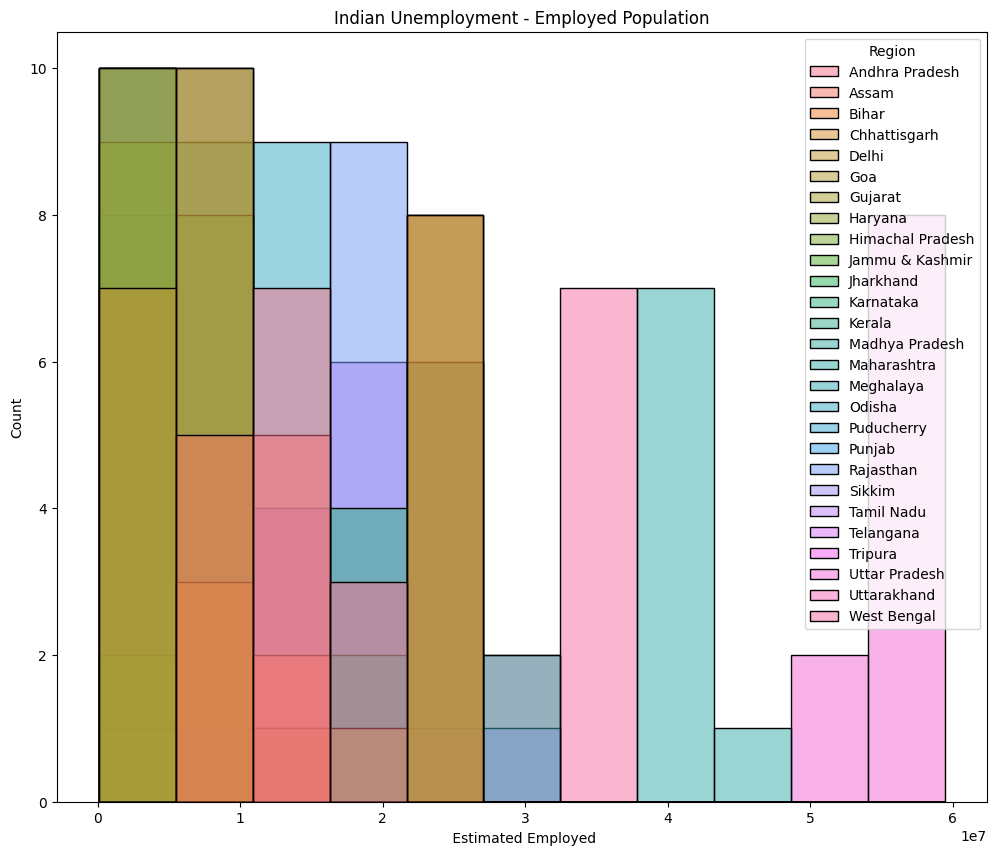

In [ ]:
# Histogram of Estimated Employed by Region
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment - Employed Population")
sns.histplot(x=" Estimated Employed", hue="Region", data=df)
plt.show()

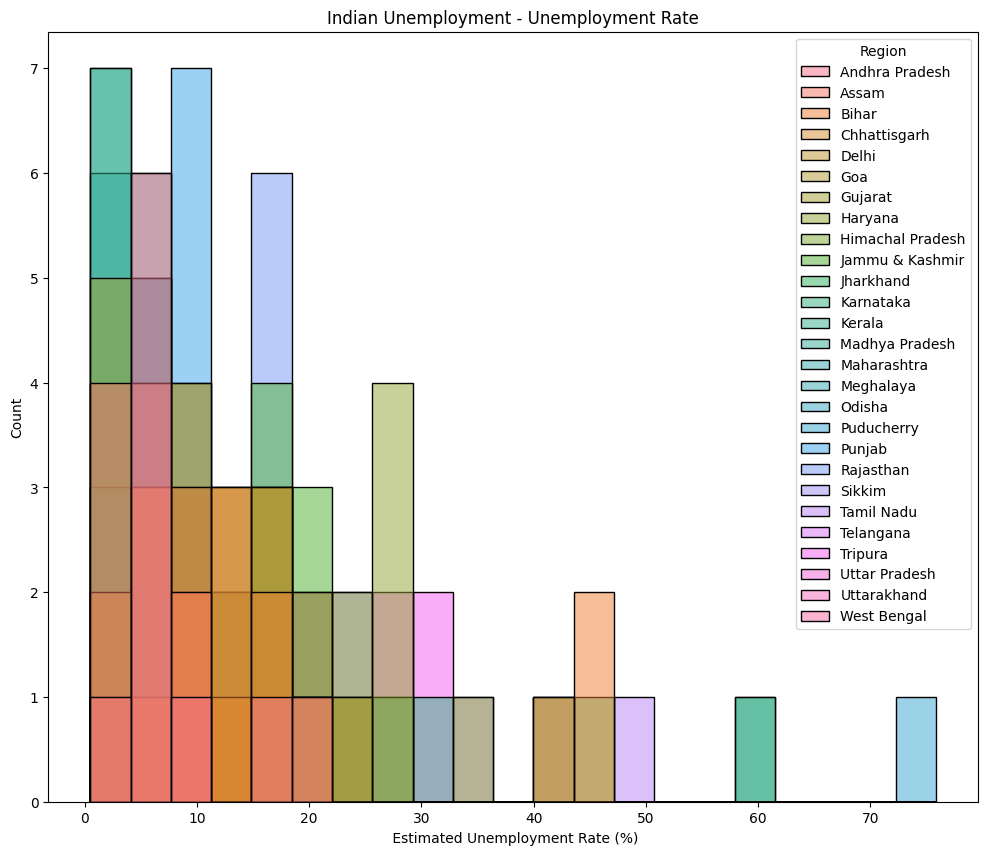

In [ ]:
# Histogram of Unemployment Rate by Region
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment - Unemployment Rate")
sns.histplot(x=" Estimated Unemployment Rate (%)", hue="Region", data=df)
plt.show()

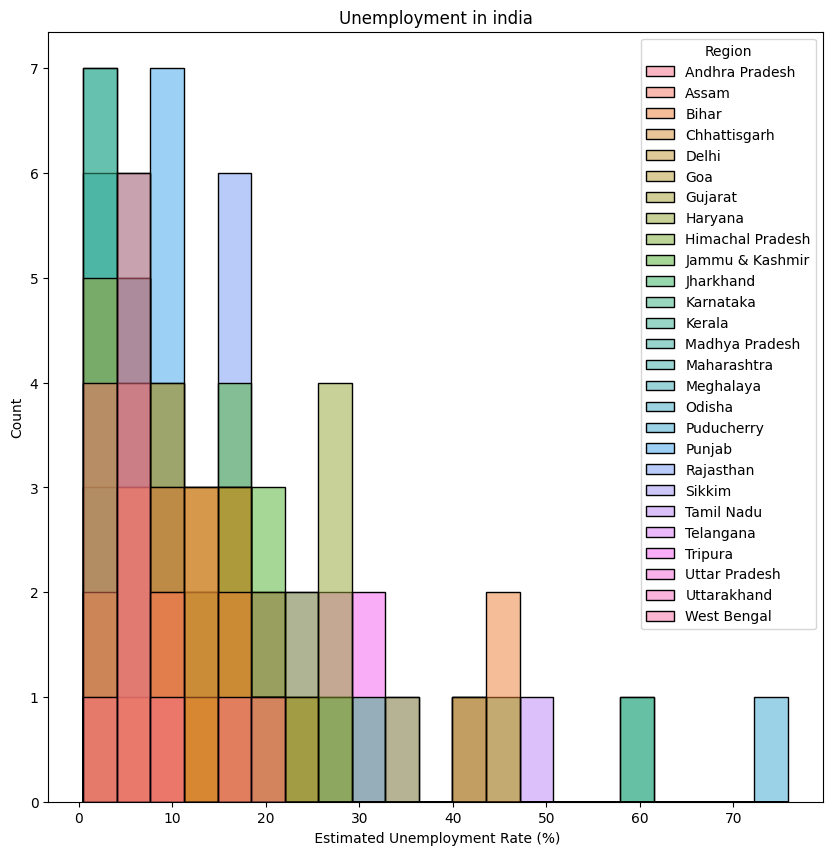

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.histplot(x=' Estimated Unemployment Rate (%)',hue= "Region", data=df ,kde=False)
plt.show()

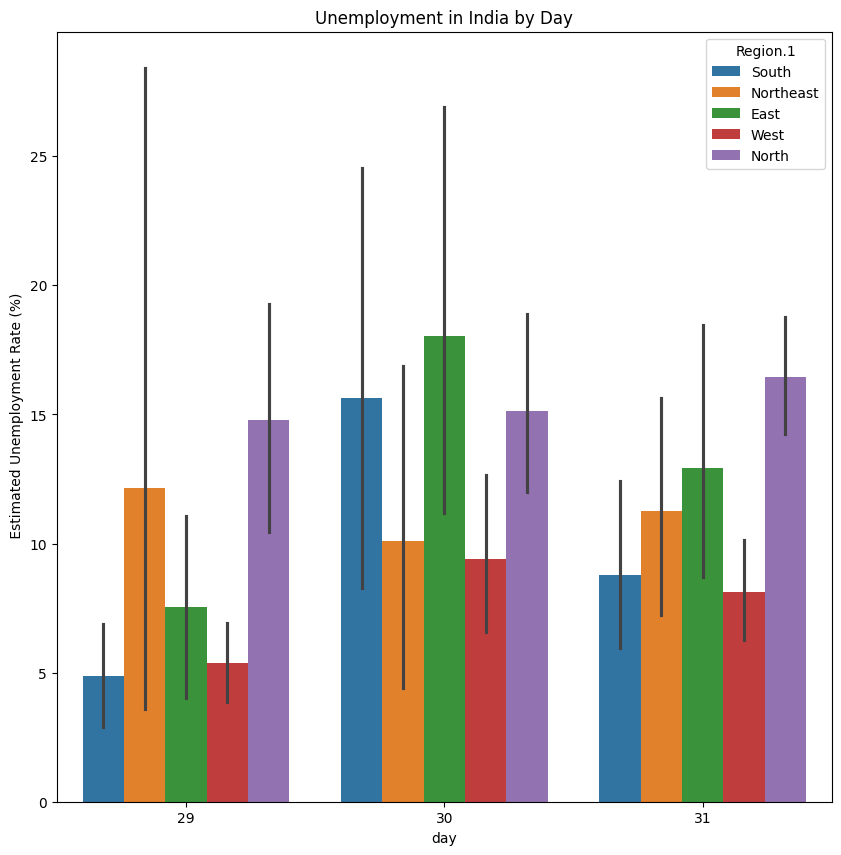

In [ ]:
# Barplot of Unemployment Rate by Day
plt.figure(figsize=(10,10))
plt.title("Unemployment in India by Day")
sns.barplot(x='day',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

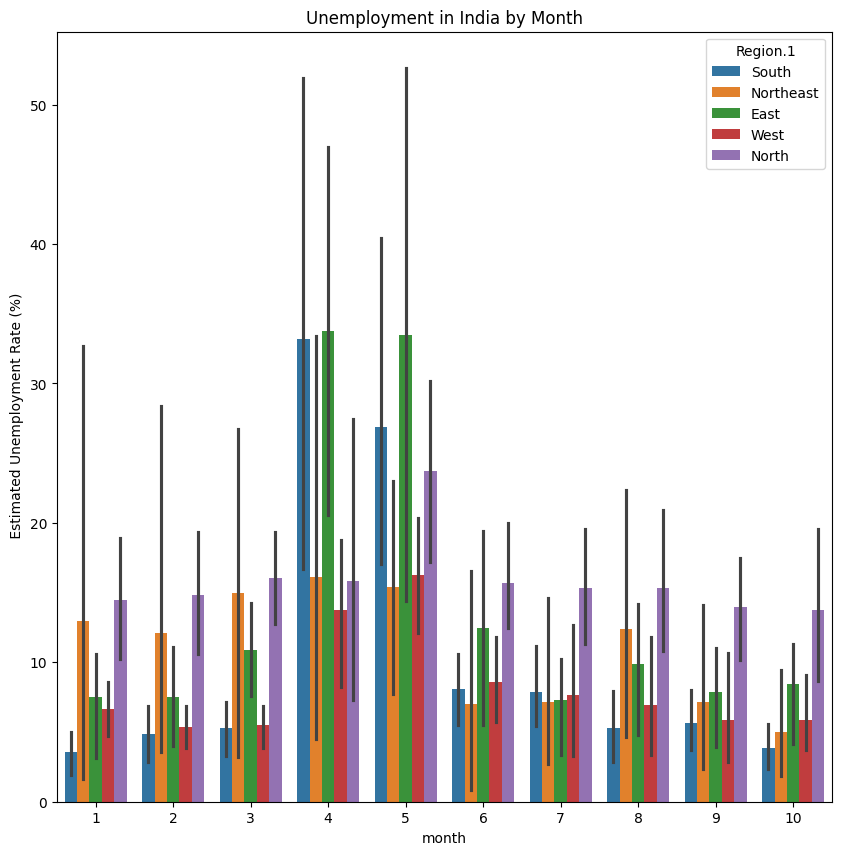

In [ ]:
# Barplot of Unemployment Rate by Month
plt.figure(figsize=(10,10))
plt.title("Unemployment in India by Month")
sns.barplot(x='month',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

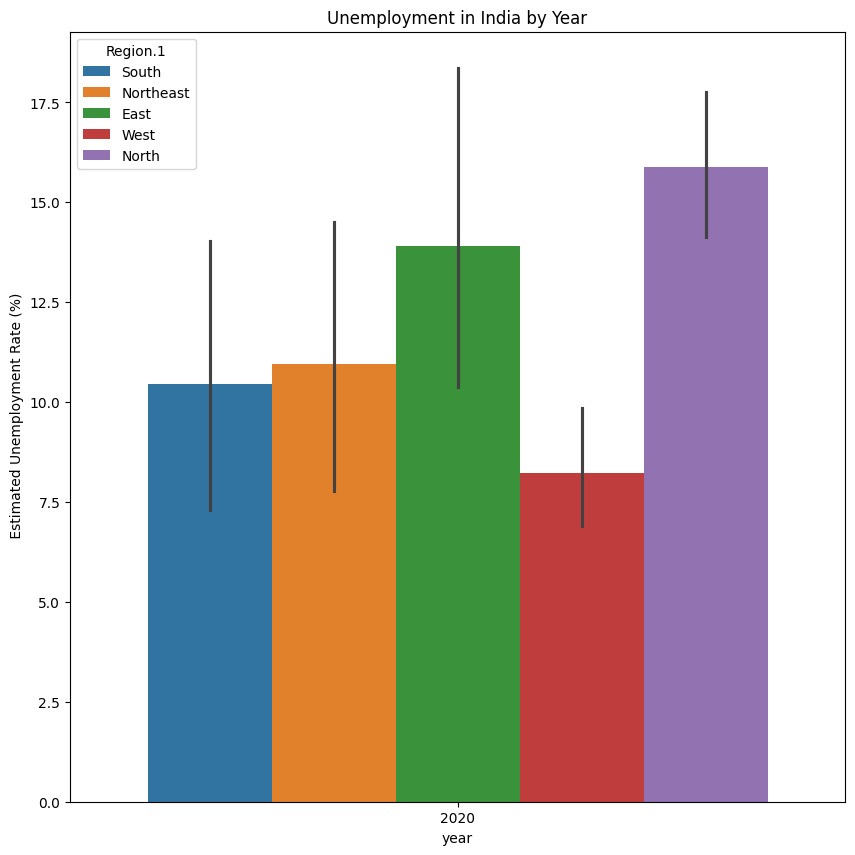

In [ ]:
# Barplot of Unemployment Rate by Year
plt.figure(figsize=(10,10))
plt.title("Unemployment in India by Year")
sns.barplot(x='year',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

In [ ]:
# Sunburst Chart of Unemployment Rate
unemploment = df[["Region",' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemploment, path=["Region"],
                     values=' Estimated Unemployment Rate (%)',
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()

In [ ]:
# Sunburst Chart of Estimated Employed
emploment = df[["Region.1",' Estimated Employed']]
figure = px.sunburst(emploment, path=["Region.1"],
                     values=' Estimated Employed',
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Employment Rate in India")
figure.show()

In [ ]:
# Summary of Key Findings
print("Summary of Key Findings:")
print(f"Total records: {len(df)}")
print(f"Date range: {df[' Date'].min().date()} to {df[' Date'].max().date()}")
print(f"Average Unemployment Rate: {df[' Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"Average Employment: {df[' Estimated Employed'].mean():,.0f}")

Summary of Key Findings:
Total records: 267
Date range: 2020-01-31 to 2020-10-31
Average Unemployment Rate: 12.24%
Average Employment: 13,962,106
